In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('HARGA RUMAH JAKSEL.xlsx')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,HARGA,LT,LB,JKT,JKM,GRS,KOTA
1,28000000000,1100,700,5,6,ADA,JAKSEL
2,19000000000,824,800,4,4,ADA,JAKSEL
3,4700000000,500,400,4,3,ADA,JAKSEL
4,4900000000,251,300,5,4,ADA,JAKSEL
...,...,...,...,...,...,...,...
997,16000000000,488,550,6,5,ADA,JAKSEL
998,4500000000,209,270,4,4,ADA,JAKSEL
999,29000000000,692,400,4,3,TIDAK ADA,JAKSEL
1000,1700000000,102,140,4,3,TIDAK ADA,JAKSEL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1002 non-null   object
 1   Unnamed: 1  1002 non-null   object
 2   Unnamed: 2  1002 non-null   object
 3   Unnamed: 3  1002 non-null   object
 4   Unnamed: 4  1002 non-null   object
 5   Unnamed: 5  1002 non-null   object
 6   Unnamed: 6  1002 non-null   object
dtypes: object(7)
memory usage: 54.9+ KB


In [5]:
df.columns = df.iloc[0,:]
df= df.iloc[1:,:]
# Ubah nilai pada kolom "HARGA" menjadi dalam satuan miliar (dengan membagi 1 miliar)
df["HARGA"]=df["HARGA"]/1000000000
df.head()

<ipython-input-5-f0aa69a0367b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HARGA"]=df["HARGA"]/1000000000


,HARGA,LT,LB,JKT,JKM,GRS,KOTA
1,28.0,1100,700,5,6,ADA,JAKSEL
2,19.0,824,800,4,4,ADA,JAKSEL
3,4.7,500,400,4,3,ADA,JAKSEL
4,4.9,251,300,5,4,ADA,JAKSEL
5,28.0,1340,575,4,5,ADA,JAKSEL


In [11]:
# Berapa rata-rata harga rumah?
harga_rata2 = df['HARGA'].mean()
print(f'Rata-rata harga rumah adalah : {harga_rata2}')

Rata-rata harga rumah adalah 17.474719280719277


In [6]:
# Apa harga rumah termurah dan termahal?
harga_termurah = df['HARGA'].min()
harga_termahal = df['HARGA'].max()
print(f'Harga rumah termurah adalah : {harga_termurah}\ndan termahal adalah : {harga_termahal}')

Harga rumah termurah adalah : 0.43
dan termahal adalah : 250.0


In [7]:
# Berapa rata-rata luas tanah dan luas bangunan?
rata_luas_tanah = df['LT'].mean()
rata_luas_bangunan = df['LB'].mean()
print(f'Rata-rata luas tanah adalah : {rata_luas_tanah}\ndan luas bangunan adalah : {rata_luas_bangunan}')

Rata-rata luas tanah adalah : 530.5044955044955
dan luas bangunan adalah : 487.27572427572426


In [12]:
# Berapa jumlah rumah berdasarkan jumlah kamar tidur?
jumlah_rumah = df['JKT'].value_counts()
print(f'Jumlah rumah berdasarkan jumlah kamar tidur adalah :\n{jumlah_rumah}')

Jumlah rumah berdasarkan jumlah kamar tidur adalah :
JKT
4     442
5     218
3     187
6      72
7      27
2      21
8      17
9       5
10      4
27      4
17      1
11      1
1       1
22      1
Name: count, dtype: int64


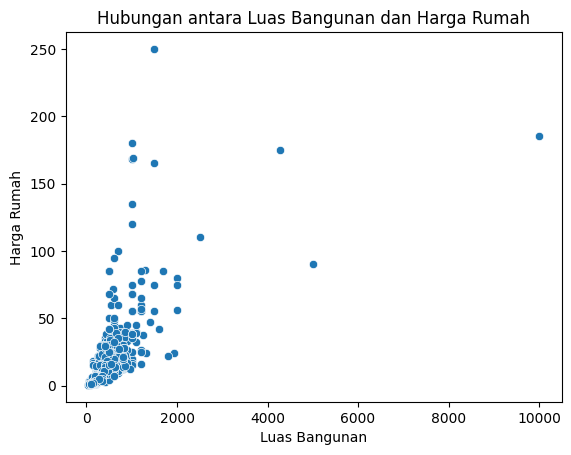

In [19]:
# Apakah ada hubungan antara luas bangunan dan harga rumah?
df["LB"].corr(df["HARGA"])

sns.scatterplot(x="LB", y="HARGA", data=df)
plt.title("Hubungan antara Luas Bangunan dan Harga Rumah")
plt.xlabel("Luas Bangunan")
plt.ylabel("Harga Rumah")
plt.show()


Rata-rata harga berdasarkan jumlah kamar:
JKT
1         16.95
2      5.221667
3      7.874701
4     15.028643
5     25.473853
6     25.951389
7         26.33
8     37.941176
9          27.1
10         48.2
11         12.0
17          6.5
22         15.5
27      27.5875
Name: HARGA, dtype: object


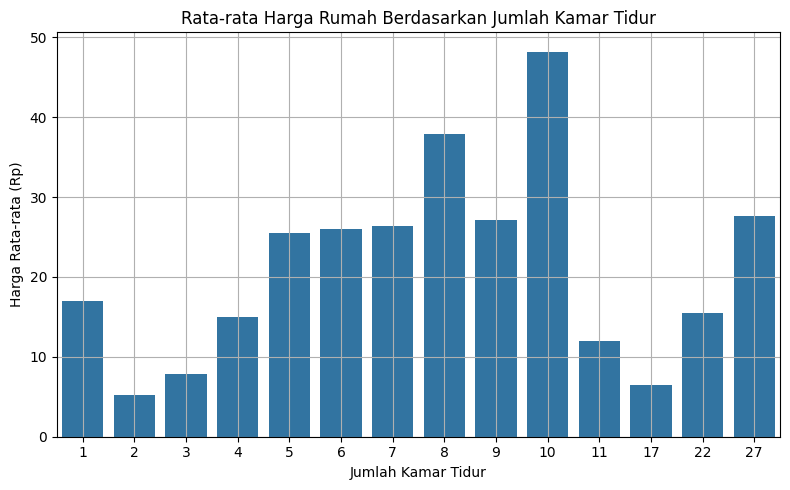

In [13]:
# Apakah rumah dengan kamar lebih banyak selalu lebih mahal?
avg_by_room = df.groupby("JKT")["HARGA"].mean().sort_index()
print("\nRata-rata harga berdasarkan jumlah kamar:")
print(avg_by_room)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_by_room.index, y=avg_by_room.values)
plt.title("Rata-rata Harga Rumah Berdasarkan Jumlah Kamar Tidur")
plt.xlabel("Jumlah Kamar Tidur")
plt.ylabel("Harga Rata-rata (Rp)")
plt.grid(True)
plt.tight_layout()
plt.show()

JKM
1         9.098
2      6.777318
3      10.86671
4     17.955107
5     30.120224
6     35.760577
7     19.868947
8     35.583333
9     37.333333
10         13.0
11         12.0
18          6.5
21         40.0
27        23.45
Name: HARGA, dtype: object


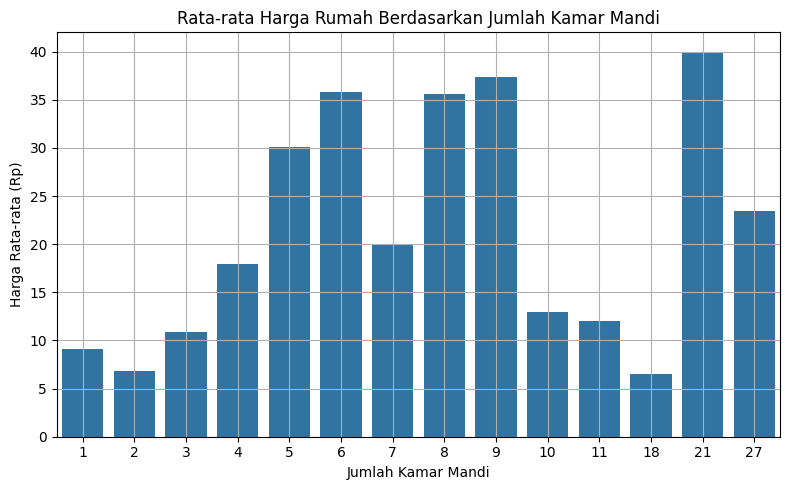

In [24]:
#Apakah rumah dengan kamar mandi lebih banyak selalu lebih mahal?
avg_by_bthroom = df.groupby('JKM')['HARGA'].mean()
print(avg_by_bthroom)

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_by_bthroom.index, y=avg_by_bthroom.values)
plt.title("Rata-rata Harga Rumah Berdasarkan Jumlah Kamar Mandi")
plt.xlabel("Jumlah Kamar Mandi")
plt.ylabel("Harga Rata-rata (Rp)")
plt.grid(True)
plt.tight_layout()
plt.show()

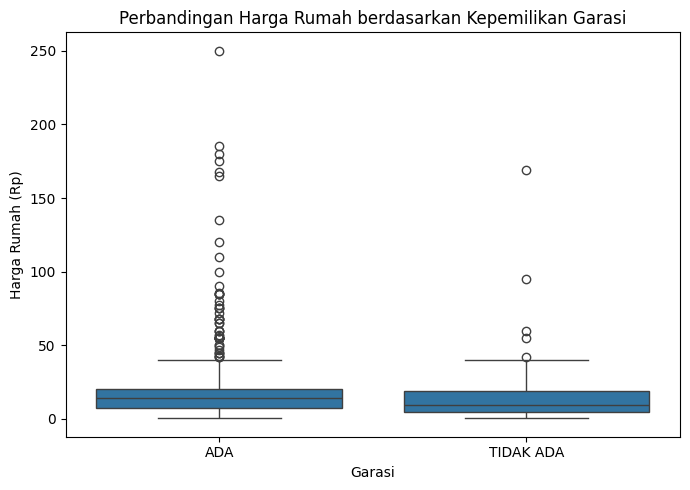

In [27]:
# Apakah rumah yang memiliki garasi lebih mahal?
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='GRS', y='HARGA')
plt.title('Perbandingan Harga Rumah berdasarkan Kepemilikan Garasi')
plt.xlabel('Garasi')
plt.ylabel('Harga Rumah (Rp)')
plt.tight_layout()
plt.show()

📌 Kesimpulan Analisis Harga Rumah di Jakarta Selatan
Berdasarkan eksplorasi data yang dilakukan, diperoleh beberapa temuan utama sebagai berikut:

Luas Bangunan (LB) vs Harga Rumah
Terdapat korelasi positif antara luas bangunan dan harga rumah. Umumnya, rumah dengan luas bangunan yang lebih besar memiliki harga yang lebih tinggi. Namun, terdapat beberapa outlier yang menunjukkan bahwa luas bangunan bukan satu-satunya faktor penentu harga.

Jumlah Kamar Tidur (JKT) vs Harga Rumah
Harga rata-rata rumah cenderung meningkat seiring bertambahnya jumlah kamar tidur, terutama hingga 10 kamar. Namun, pada jumlah kamar yang ekstrem (seperti 17, 22, dan 27), harga tidak selalu lebih tinggi.

Jumlah Kamar Mandi (JKM) vs Harga Rumah
Secara umum, semakin banyak jumlah kamar mandi, semakin tinggi rata-rata harga rumah. Rumah dengan 9 kamar mandi memiliki harga rata-rata tertinggi. Namun, seperti sebelumnya, jumlah kamar mandi yang terlalu banyak tidak selalu menjamin harga lebih tinggi.

Kepemilikan Garasi (GRS) vs Harga Rumah
Rumah yang memiliki garasi cenderung memiliki harga median yang sedikit lebih tinggi dibandingkan rumah tanpa garasi. Meskipun demikian, persebaran harga pada kedua kategori ini cukup mirip, dan banyak ditemukan nilai outlier.

💡 Kesimpulan Umum
Faktor-faktor seperti luas bangunan, jumlah kamar tidur, jumlah kamar mandi, dan kepemilikan garasi memang berpengaruh terhadap harga rumah, namun tidak dapat dijadikan satu-satunya indikator. Terdapat variabel-variabel lain yang kemungkinan besar berperan signifikan, seperti lokasi, kondisi bangunan, akses jalan.

